# Exploratory Data Analysis (EDA) Notebook

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [37]:
# Setting Visualization Aesthetics
sns.set(style="whitegrid")

# Section 1: Understanding Random Variables
Random variables are columns in a dataset that can be either numerical or categorical.
Numerical variables can be:
  - Continuous: Values with decimals (e.g., height in cm)
  - Discrete: Whole numbers (e.g., count of items)
Categorical variables can be:
  - Nominal: Unordered categories (e.g., eye color)
  - Ordinal: Ordered categories (e.g., education level)

In [38]:
from sklearn.datasets import fetch_california_housing

# Load example dataset
dataset = fetch_california_housing(download_if_missing=True)

# Create a Pandas DataFrame
df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
df['target'] = dataset.target

# Display the DataFrame
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [39]:
### Exercise 1.1
"""
For each column in the dataset, identify its random variable type.
- MedInc (Median Income):
    Type: Continuous (ratio scale)
    Explanation: This variable represents the median income in a block group. It is measured on a continuous scale with a true zero, meaning income values can take on any real number within the range.
- HouseAge (Median House Age):
    Type: Continuous (ratio scale)
    Explanation: Although house age is measured in years (which are typically whole numbers), it is treated as a continuous variable for modeling purposes because the differences between ages are meaningful and the variable can be approximated as continuous.
- AveRooms (Average Number of Rooms):
    Type: Continuous (ratio scale)
    Explanation: This is the average number of rooms per household. It is computed as a mean and can take on non-integer values, making it continuous.
- AveBedrms (Average Number of Bedrooms):
    Type: Continuous (ratio scale)
    Explanation: Similar to AveRooms, this is an average value that can be fractional and is measured on a ratio scale.
- Population (Block Group Population):
    Type: Discrete (but often treated as continuous in analysis)
    Explanation: This variable counts the number of people in a block group. Although counts are inherently discrete, in many statistical models (especially when the counts are large) it is approximated as continuous.
- AveOccup (Average Occupancy):
    Type: Continuous (ratio scale)
    Explanation: This variable represents the average number of household members per dwelling, computed as a mean, so it is treated as continuous.
- Latitude (Geographical Latitude):
    Type: Continuous (interval/ratio scale)
    Explanation: Latitude is a continuous measure representing the geographic coordinate; while its interpretation can be thought of as interval (because it doesn't have a “true zero” in a geographic sense), for practical data analysis it is used as a continuous variable.
- Longitude (Geographical Longitude):
    Type: Continuous (interval/ratio scale)
    Explanation: Like Latitude, Longitude is a continuous measurement of geographic location.
- target (Median House Value):
    Type: Continuous (ratio scale)
    Explanation: This variable represents the median house value in the block group (often scaled, e.g., in units of $100,000). It is measured on a continuous scale with a meaningful zero.
"""

"\nFor each column in the dataset, identify its random variable type.\n- MedInc (Median Income):\n    Type: Continuous (ratio scale)\n    Explanation: This variable represents the median income in a block group. It is measured on a continuous scale with a true zero, meaning income values can take on any real number within the range.\n- HouseAge (Median House Age):\n    Type: Continuous (ratio scale)\n    Explanation: Although house age is measured in years (which are typically whole numbers), it is treated as a continuous variable for modeling purposes because the differences between ages are meaningful and the variable can be approximated as continuous.\n- AveRooms (Average Number of Rooms):\n    Type: Continuous (ratio scale)\n    Explanation: This is the average number of rooms per household. It is computed as a mean and can take on non-integer values, making it continuous.\n- AveBedrms (Average Number of Bedrooms):\n    Type: Continuous (ratio scale)\n    Explanation: Similar to Av

In [40]:
df.iloc[0]

,0
MedInc,8.325200
HouseAge,41.000000
AveRooms,6.984127
AveBedrms,1.023810
Population,322.000000
AveOccup,2.555556
Latitude,37.880000
Longitude,-122.230000
target,4.526000


# Section 2: Descriptive Statistics
Exploring key metrics such as mean, median, mode, variance, and IQR.


In [41]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'target'],
      dtype='object')

In [42]:
# Compute Descriptive Statistics
age = df['HouseAge']

In [43]:
# Mean: Sum of all values divided by the number of values
mean_age = df['HouseAge'].mean()
mean_age

28.639486434108527

In [44]:
### Exercise 2.1
"""
Write the mean function from scratch.
"""
def mean_scratch(data):
  total = sum(data)
  count = len(data)
  return total / count

In [45]:
# Median: Middle value when sorted
sorted_age = sorted(age)
n = len(sorted_age)
if n % 2 == 0:
    median_age = (sorted_age[n // 2 - 1] + sorted_age[n // 2]) / 2
else:
    median_age = sorted_age[n // 2]

median_age

29.0

In [46]:
### Exercise 2.2
"""
What's the function to calculate the median in Pandas?
"""
age.median()

29.0

In [14]:
# Mode: Most frequently occurring value
mode_age = age.mode()[0]

In [15]:
# Variance: Average squared deviation from the mean
variance_age = sum((x - mean_age) ** 2 for x in age) / (len(age) - 1)
variance_age

158.39626040778117

In [48]:
# Standard Deviation: Square root of variance
std_dev_age = variance_age ** 0.5
std_dev_age

12.585557612111637

In [49]:
### Exercise 2.3
"""
What's the function to calculate the standard deviation in Pandas?
"""
age.std()

12.585557612111637

In [18]:
# IQR: Q3 - Q1
q1 = np.percentile(age, 25)
q3 = np.percentile(age, 75)
iqr = q3 - q1
iqr

19.0

In [19]:
print("\nDescriptive Statistics for 'HouseAge':")
print(f"Mean: {mean_age}")
print(f"Median: {median_age}")
print(f"Mode: {mode_age}")
print(f"Variance: {variance_age}")
print(f"Standard Deviation: {std_dev_age}")
print(f"IQR: {iqr}")


Descriptive Statistics for 'HouseAge':
Mean: 28.639486434108527
Median: 29.0
Mode: 52.0
Variance: 158.39626040778117
Standard Deviation: 12.585557612111637
IQR: 19.0


In [50]:
### Exercise 2.4
"""
Is there a function to print the statistics of a dataset?
"""
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


How many different categories are there?
target
10    600
15    599
8     598
9     597
11    595
7     594
13    594
5     593
14    593
2     591
12    591
3     590
6     585
1     584
4     578
17    564
16    546
0     480
18    465
19    377
Name: count, dtype: int64
What are the names of the categories?
[ 7  4  1 14 16 13  3  2  8 19  6  0 12  5 10  9 15 17 18 11]
Distribution of samples across categories.


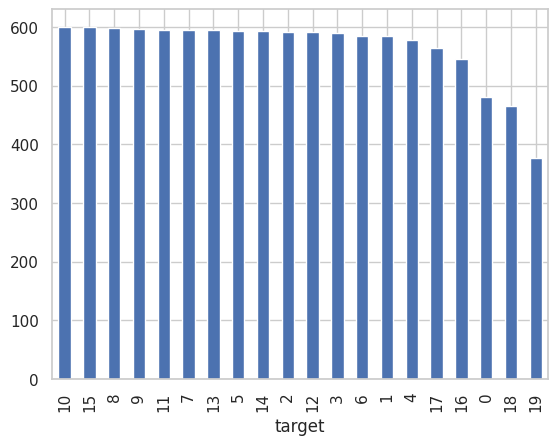

In [58]:
### Exercise 2.5
"""
Explore the fetch_20newsgroups dataset and answer the following questions:
1. How many different categories are there?
2. What are the names of the categories?
3. Distribution of samples across categories.

"""
from sklearn.datasets import fetch_20newsgroups
import pandas as pd

# Load the 20 Newsgroups dataset
newsgroups = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))
df_news = pd.DataFrame({'text': newsgroups.data, 'target': newsgroups.target})

In [59]:

# 1.
print("How many different categories are there?")
print(df_news['target'].value_counts())

How many different categories are there?
target
10    600
15    599
8     598
9     597
11    595
7     594
13    594
5     593
14    593
2     591
12    591
3     590
6     585
1     584
4     578
17    564
16    546
0     480
18    465
19    377
Name: count, dtype: int64


In [60]:
# 2.
print("What are the names of the categories?")
print(df_news['target'].unique())

What are the names of the categories?
[ 7  4  1 14 16 13  3  2  8 19  6  0 12  5 10  9 15 17 18 11]


Distribution of samples across categories.


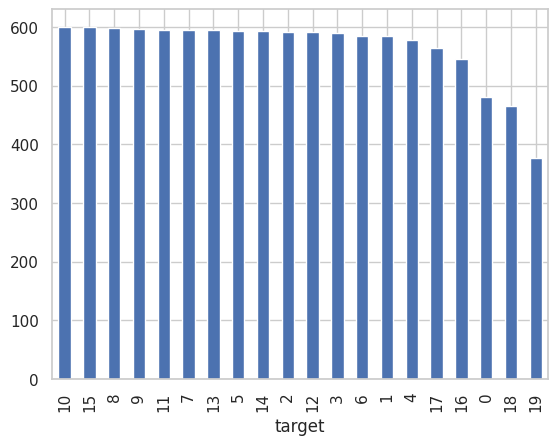

In [61]:
# 3.
print("Distribution of samples across categories.")
df_news['target'].value_counts().plot(kind='bar')
plt.show()

In [63]:
### Exercise 2.6
"""
Explore the fetch_20newsgroups dataset and answer the following questions:
1. Calculate the average length of the text documents
2. Explore the most frequent words in the dataset using a word cloud or frequency distribution. (Requires additional libraries like nltk and wordcloud)
"""
# 1.
df_news['text_length'] = df_news['text'].apply(len)
df_news['text_length'].mean()

1218.1354958458546

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


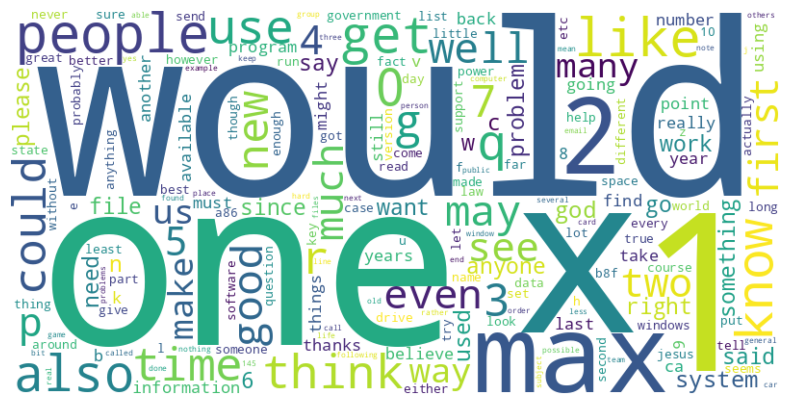

In [66]:
# 2.
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

# Combine all text data into a single string
all_text = ' '.join(df_news['text'])

# Tokenize the text
tokens = word_tokenize(all_text.lower())

# Remove stop words and punctuation
stop_words = set(stopwords.words('english'))
tokens = [word for word in tokens if word.isalnum() and word not in stop_words]

# Create a frequency distribution
word_freq = nltk.FreqDist(tokens)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()



# Section 3: Data Cleaning and Preparation
Ensuring data quality by handling missing values, duplicates, and inconsistencies.


In [23]:
# Example: Handling Missing Values
non_cleaned_data = df.copy()
non_cleaned_data.loc[2, 'AveRooms'] = np.nan
print("\nData with Missing Value:")
non_cleaned_data


Data with Missing Value:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,NaN,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [24]:
# Fill Missing Values with Median
sorted_AveRooms = non_cleaned_data['AveRooms'].dropna().sort_values()
median = sorted_AveRooms.median()
median

5.2290909090909095

In [25]:
non_cleaned_data['AveRooms'] = non_cleaned_data['AveRooms'].fillna(median)
print("\nData with Filled Missing Values:")
non_cleaned_data


Data with Filled Missing Values:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,5.229091,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


# Section 4: Data Visualization
Visualizing data using histograms, scatter plots, and box plots.

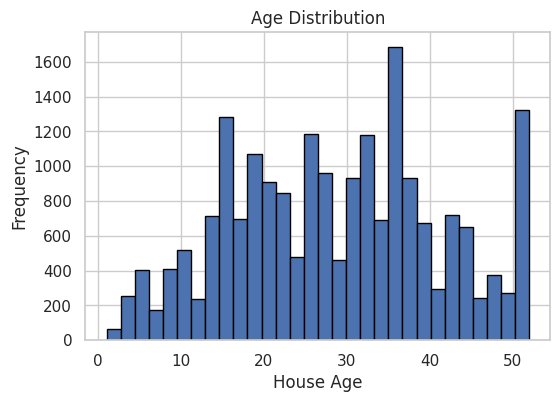

In [26]:
# Univariate Visualization
plt.figure(figsize=(6, 4))
plt.hist(df['HouseAge'], bins=30, edgecolor='black')  # Adjust the number of bins as needed

plt.title("Age Distribution")
plt.xlabel("House Age")
plt.ylabel("Frequency")

plt.show()

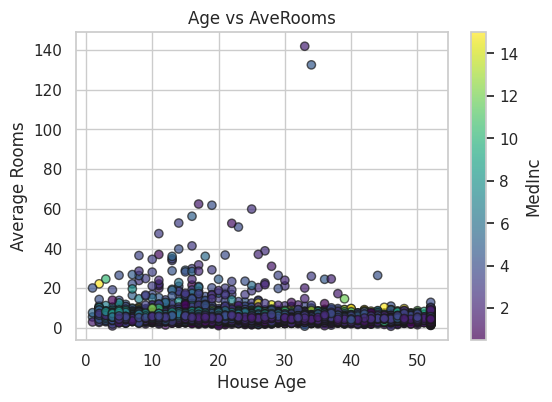

In [27]:
plt.figure(figsize=(6, 4))
scatter = plt.scatter(df["HouseAge"], df["AveRooms"], c=df["MedInc"], cmap="viridis", edgecolor='k', alpha=0.7)

plt.colorbar(scatter, label="MedInc")
plt.title("Age vs AveRooms")
plt.xlabel("House Age")
plt.ylabel("Average Rooms")

plt.show()

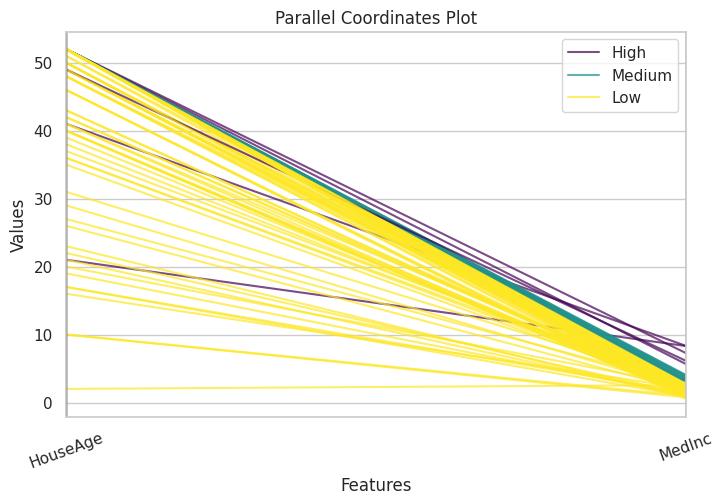

In [28]:
# Multivariate Visualization
import pandas as pd
from pandas.plotting import parallel_coordinates

df_subset = df[['HouseAge', 'MedInc']][:100]  # Selecting relevant columns and a subset
df_subset = df_subset.assign(
    Category=pd.qcut(df['MedInc'], q=3, labels=['Low', 'Medium', 'High']))  # Categorizing MedInc

plt.figure(figsize=(8, 5))
parallel_coordinates(df_subset, class_column='Category', colormap=plt.cm.viridis, alpha=0.7)

plt.title("Parallel Coordinates Plot")
plt.xlabel("Features")
plt.ylabel("Values")
plt.xticks(rotation=20)  # Rotate labels for better readability
plt.grid(True)

plt.show()

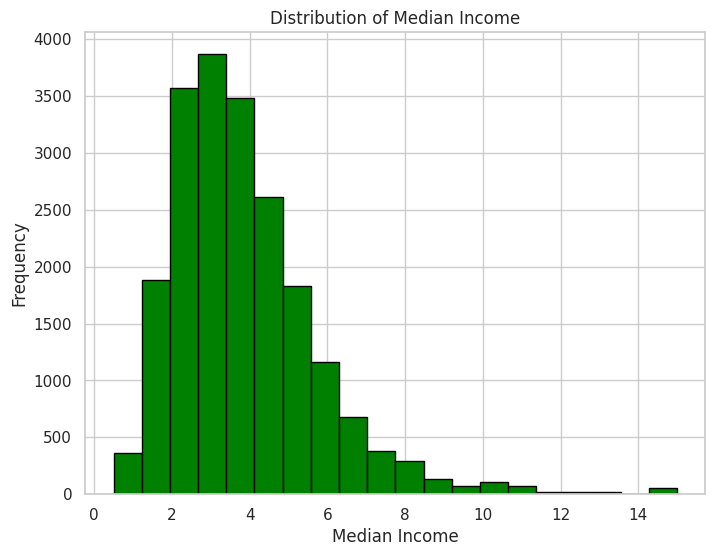

In [67]:
### Exercise 4.1
"""
Create a histogram of the 'MedInc' (Median Income) column.
Customize the plot with:
  - A title: "Distribution of Median Income"
  - X-axis label: "Median Income"
  - Y-axis label: "Frequency"
  - A different color for the bars (e.g., 'green')
  - A specified number of bins (e.g., 20)
"""
plt.figure(figsize=(8, 6))
plt.hist(df['MedInc'], bins=20, color='green', edgecolor='black')
plt.title('Distribution of Median Income')
plt.xlabel('Median Income')
plt.ylabel('Frequency')
plt.show()

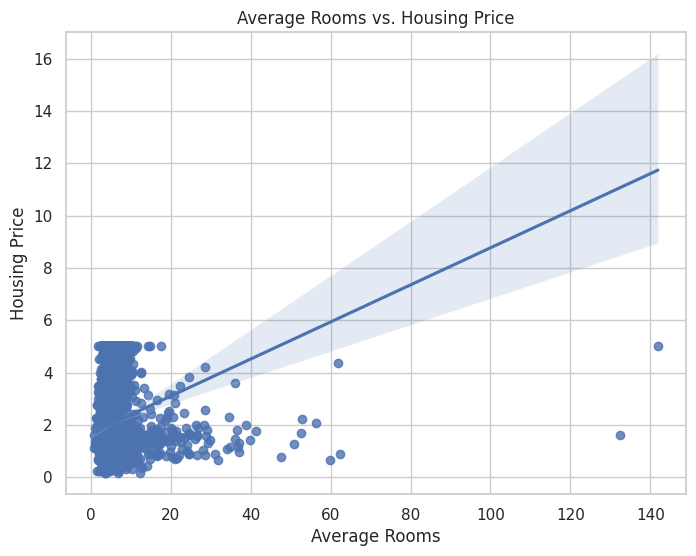

In [70]:
### Exercise 4.2
"""
Create a scatter plot of 'AveRooms' (Average Rooms) vs. 'target' (Housing Price).
Add a regression line to the plot to show the trend.
Customize the plot with appropriate labels and a title.
"""
plt.figure(figsize=(8, 6))
sns.regplot(x='AveRooms', y='target', data=df) # Use seaborn's regplot for scatter plot with regression line
plt.title('Average Rooms vs. Housing Price')
plt.xlabel('Average Rooms')
plt.ylabel('Housing Price')
plt.show()

Text(0, 0.5, 'Housing Price')

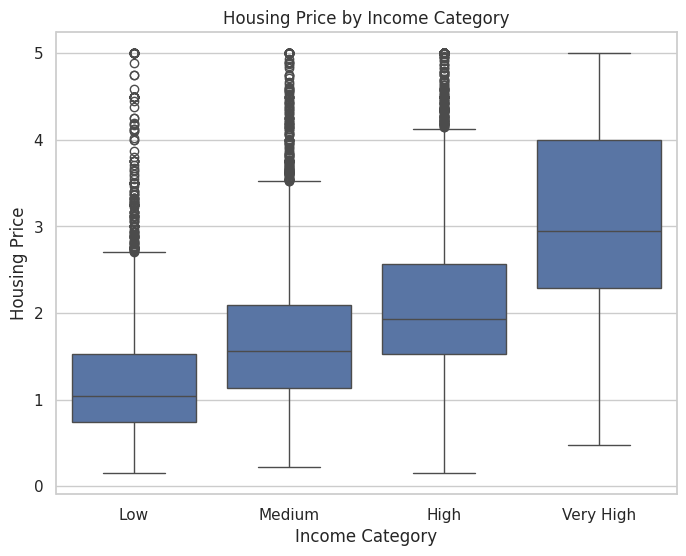

In [71]:
### Exercise 4.3
"""
Create a box plot of 'target' (Housing Price) grouped by 'MedInc' categories (Median Income).
Use the pandas `qcut` function to create 4 income categories.
Customize the plot with appropriate labels and a title.
"""
df['income_category'] = pd.qcut(df['MedInc'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])
plt.figure(figsize=(8, 6))
sns.boxplot(x='income_category', y='target', data=df)
plt.title('Housing Price by Income Category')
plt.xlabel('Income Category')
plt.ylabel('Housing Price')

In [32]:
### Exercise 4.4
"""
Make 3 Hypothesis on the dataset and test them using the plots you created or more.
"""


'\nMake 3 Hypothesis on the dataset and test them using the plots you created or more.\n'

# Section 5: Exercises
1. Load a dataset of your choice and identify its random variables. (https://scikit-learn.org/1.5/api/sklearn.datasets.html)
2. Explore each column of the dataset.
3. Calculate descriptive statistics (mean, median, mode, variance, standard deviation, IQR) for at least two numerical variables.
4. Clean the data by handling missing values and removing duplicates.
5. Identify outliers using the IQR method and handle them appropriately.

In [73]:

### Exercise 5.1
"""
Load a dataset of your choice (e.g., the Iris dataset) and identify its random variables.
"""
from sklearn.datasets import load_iris

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df.head()

# Identify random variables
# sepal length (cm): continuous
# sepal width (cm): continuous
# petal length (cm): continuous
# petal width (cm): continuous
# target: categorical (representing the iris species)

### Exercise 5.2
"""
Explore each column of the dataset.
"""
iris_df.describe() # Summary statistics
iris_df.info()  # Data types and missing values
for col in iris_df.columns:
    print(f"Column: {col}")
    print(iris_df[col].value_counts())
    print("-" * 20)

### Exercise 5.3
"""
Calculate descriptive statistics for two numerical variables.
"""

# Descriptive statistics for sepal length
sepal_length = iris_df['sepal length (cm)']
mean_sl = sepal_length.mean()
median_sl = sepal_length.median()
mode_sl = sepal_length.mode()[0]
var_sl = sepal_length.var()
std_sl = sepal_length.std()
q1_sl = sepal_length.quantile(0.25)
q3_sl = sepal_length.quantile(0.75)
iqr_sl = q3_sl - q1_sl

print("Sepal Length Statistics:")
print(f"Mean: {mean_sl}")
print(f"Median: {median_sl}")
print(f"Mode: {mode_sl}")
print(f"Variance: {var_sl}")
print(f"Standard Deviation: {std_sl}")
print(f"IQR: {iqr_sl}")


# Descriptive statistics for petal width
petal_width = iris_df['petal width (cm)']
mean_pw = petal_width.mean()
median_pw = petal_width.median()
mode_pw = petal_width.mode()[0]
var_pw = petal_width.var()
std_pw = petal_width.std()
q1_pw = petal_width.quantile(0.25)
q3_pw = petal_width.quantile(0.75)
iqr_pw = q3_pw - q1_pw

print("\nPetal Width Statistics:")
print(f"Mean: {mean_pw}")
print(f"Median: {median_pw}")
print(f"Mode: {mode_pw}")
print(f"Variance: {var_pw}")
print(f"Standard Deviation: {std_pw}")
print(f"IQR: {iqr_pw}")

### Exercise 5.4
"""
Clean the data by handling missing values and removing duplicates.
"""

# Check for missing values
print(iris_df.isnull().sum())

# Remove duplicates
iris_df.drop_duplicates(inplace=True)

### Exercise 5.5
"""
Identify outliers using the IQR method and handle them appropriately.
"""
# Outlier detection for sepal length (same for other columns)
lower_bound_sl = q1_sl - 1.5 * iqr_sl
upper_bound_sl = q3_sl + 1.5 * iqr_sl
outliers_sl = iris_df[(iris_df['sepal length (cm)'] < lower_bound_sl) | (iris_df['sepal length (cm)'] > upper_bound_sl)]
print(f"\nSepal Length Outliers:\n{outliers_sl}")

# Handling outliers: capping (replace with the bounds)
iris_df['sepal length (cm)'] = np.clip(iris_df['sepal length (cm)'], lower_bound_sl, upper_bound_sl)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
Column: sepal length (cm)
sepal length (cm)
5.0    10
5.1     9
6.3     9
5.7     8
6.7     8
5.8     7
5.5     7
6.4     7
4.9     6
5.4     6
6.1     6
6.0     6
5.6     6
4.8     5
6.5     5
6.2     4
7.7     4
6.9     4
4.6     4
5.2     4
5.9     3
4.4     3
7.2     3
6.8     3
6.6     2
4.7     2
7.6     1
7.4     1
7.3     1
7.0     1
7.1     1
5.3     1
4.3     1
4.5     1
7.9     1
Name: count, dtype: int64
--------------------
Column: sepal width (cm)
sepal width (cm)
3.0    26
2.8    14
3.2    